In [250]:
# import the required libraries
import pandas as pd
import numpy as np
#import the dataset 
df = pd.read_excel('DirtyDataset.xlsx')

### Step 1: Insert the dirty dataset

In [251]:
#Check whether the dataset is imported or not.
df.head()

,Player Practice Stats,,.1,.2,.3,.4
0,,,,,,
1,,,,,,
2,,,,,,
3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
4,,,,,,


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Player Practice Stats  228 non-null    object
 1                          228 non-null    object
 2    .1                    228 non-null    object
 3    .2                    228 non-null    object
 4    .3                    227 non-null    object
 5    .4                    228 non-null    object
dtypes: object(6)
memory usage: 10.8+ KB


## Now lets start cleaning

### Step 2: First remove the totally empty rows
- In the dataset we have lot of empty cells and empty rows. But Pandas identify an empty cell or row only when there is a 'NaN' or a np.nan object.So first replace the empty cells into a NaN object.
- To replace the empty cells first check how the empty cells are decoded by pandas

In [253]:
#Since in the dirty dataset second row is totally empty, check how pandas decoded that
temp = df.iloc[2,2]
temp

'\xa0'

In [254]:
# So now replace all this values as  NaN 
df.replace(temp, np.nan, inplace=True)

In [255]:
#Now check it again
df.head()
#So now it detected all the empty cell as NaN.

,Player Practice Stats,,.1,.2,.3,.4
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
4,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df.dropna(how='all', inplace=True)
df.head()

,Player Practice Stats,,.1,.2,.3,.4
3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
5,45234.0,Maud Nicholson,M1,2.0,NaN,82.0
6,NaN,NaN,M3,3.0,NaN,71.0
7,NaN,NaN,M5,0.0,NaN,36.0
8,NaN,NaN,M6,1.0,NaN,76.0


### Step 3: Remove the unwanted header 'Player Practice Stats' and give the proper header to the dataset


In [257]:
#Extract the row 'Player Code', 'Player Name'.... to use as the header
new_header = df.iloc[0,:]   

#Now remove the top 2 rows from the dataframe
df=df[1:]

#Now assign the new_header we extracted as the header
df.columns = new_header

In [258]:
#Check the updates
df.head()

3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
5,45234.0,Maud Nicholson,M1,2.0,NaN,82.0
6,NaN,NaN,M3,3.0,NaN,71.0
7,NaN,NaN,M5,0.0,NaN,36.0
8,NaN,NaN,M6,1.0,NaN,76.0
9,NaN,Total Player Runs,NaN,NaN,NaN,265.0


### Step 4: Remove the rows that contain 'TotalPlayerRuns'.

It seems that the raw file was in pivoted form but now we don't need the pivoted form so we can remove the 'Total Player Runs' row. Also we don't need the grand total row.

In [259]:
#rather than removing the unwanted rows we will create a new df that contains only the rows that we want
df2 = df[df['\xa0 Player Name'] != 'Total Player Runs']
df2 = df2[df2['\xa0 Player Name'] != 'Gran Total Stats of All the above players']
df2

3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
5,45234.0,Maud Nicholson,M1,2.0,NaN,82.0
6,NaN,NaN,M3,3.0,NaN,71.0
7,NaN,NaN,M5,0.0,NaN,36.0
8,NaN,NaN,M6,1.0,NaN,76.0
10,4578.0,Logan Thomas,M1,0.0,NaN,4.0
...,...,...,...,...,...,...
220,7845522.0,Tori Knowles,M1,2.0,NaN,54.0
222,787511.0,Raj Webb,M1,1.0,NaN,89.0
223,NaN,NaN,M2,4.0,NaN,31.0
224,NaN,NaN,M3,0.0,NaN,92.0


# Step 5: Fill the NaN values with their respective values
Pandas has a forward filling method that fills the missing values with the previous value.

In [260]:
df2 = df2.fillna(method='ffill')

#check the output
df2

3,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
5,45234.0,Maud Nicholson,M1,2.0,NaN,82.0
6,45234.0,Maud Nicholson,M3,3.0,NaN,71.0
7,45234.0,Maud Nicholson,M5,0.0,NaN,36.0
8,45234.0,Maud Nicholson,M6,1.0,NaN,76.0
10,4578.0,Logan Thomas,M1,0.0,NaN,4.0
...,...,...,...,...,...,...
220,7845522.0,Tori Knowles,M1,2.0,NaN,54.0
222,787511.0,Raj Webb,M1,1.0,NaN,89.0
223,787511.0,Raj Webb,M2,4.0,NaN,31.0
224,787511.0,Raj Webb,M3,0.0,NaN,92.0


In [261]:
#Seems like there is an empty column NaN. Lets remove it
df2 = df2.dropna(axis=1, how='all')
df2

3,Player Code,Player Name,Match Number,Number of Wickets Taken,Number of Runs
5,45234.0,Maud Nicholson,M1,2.0,82.0
6,45234.0,Maud Nicholson,M3,3.0,71.0
7,45234.0,Maud Nicholson,M5,0.0,36.0
8,45234.0,Maud Nicholson,M6,1.0,76.0
10,4578.0,Logan Thomas,M1,0.0,4.0
...,...,...,...,...,...
220,7845522.0,Tori Knowles,M1,2.0,54.0
222,787511.0,Raj Webb,M1,1.0,89.0
223,787511.0,Raj Webb,M2,4.0,31.0
224,787511.0,Raj Webb,M3,0.0,92.0


### Step 5: Reset the index and save the cleaned dataset


In [262]:
#Reset the index
df2.reset_index(drop=True, inplace=True)
df2.dropna(axis=1, how = 'all')
#Save the cleaned dataset
df2.to_excel('CleanedDataset.xlsx')

### Now for other calculations now we will use the cleaned dataset

In [263]:
df = pd.read_excel('CleanedDataset.xlsx')
df.head()

,Unnamed: 0,Player Code,Player Name,Match Number,Number of Wickets Taken,Number of Runs
0,0,45234,Maud Nicholson,M1,2,82
1,1,45234,Maud Nicholson,M3,3,71
2,2,45234,Maud Nicholson,M5,0,36
3,3,45234,Maud Nicholson,M6,1,76
4,4,4578,Logan Thomas,M1,0,4


### The grand total number of wickets taken by all the players

In [264]:
df1 = df['Number of Wickets Taken\xa0']
total_wickets_taken = df1.sum()
print('The grand total number of wickets taken by all the players: ', total_wickets_taken)

The grand total number of wickets taken by all the players:  276


### The total number of runs made in each match (M1 till M8)

In [265]:
groups = df.groupby(['Match Number']).sum()
TotalRuns = groups['\xa0 \xa0Number of Runs\xa0']
TotalRuns

Match Number
M1    3623
M2     259
M3    2548
M4      19
M5    2064
M6      83
M7     295
M8     278
Name:    Number of Runs , dtype: int64

### The average number of runs made in each Match (M1 till M8) using a bar graph

In [266]:
# Perform a group by and then find the average
df.groupby(['Match Number']).mean()

,Unnamed: 0,Player Code,Number of Wickets Taken,Number of Runs
Match Number,,,,
M1,84.075758,1.436130e+08,1.863636,54.893939
M2,77.333333,7.529105e+05,2.666667,43.166667
M3,79.520000,9.482855e+07,1.940000,50.960000
M4,152.000000,7.875110e+05,1.000000,19.000000
M5,52.500000,5.449114e+05,1.250000,86.000000
M6,53.500000,2.467750e+04,2.500000,41.500000
M7,32.500000,4.564500e+04,2.000000,147.500000
M8,27.500000,7.456000e+03,0.000000,139.000000


<AxesSubplot:title={'center':'Average Run in Each match'}, xlabel='Match', ylabel='Average Run'>

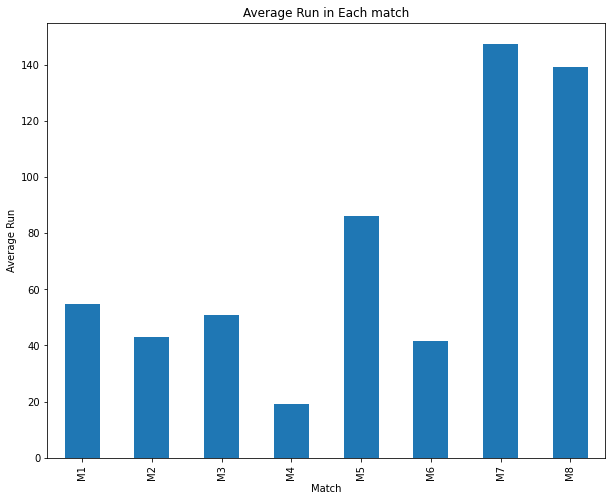

In [267]:
# We need to plot only the avgerage Run so do this
groups = df.groupby(['Match Number']).mean(['Number of Runs'])
avgRun = groups['\xa0 \xa0Number of Runs\xa0']

#Plot the bar graph
avgRun.plot(kind='bar', title='Average Run in Each match', ylabel='Average Run',
         xlabel='Match', figsize=(10, 8))